In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel(r"C:\Users\Vatsal\Downloads\Excel\COVID_India.xlsx")
data.shape

(123, 2)

In [3]:
data.isnull().sum()

Day             0
active_cases    0
dtype: int64

In [4]:
df = pd.DataFrame(data)

In [5]:
df.head()

,Day,active_cases
0,2020-01-31,1
1,2020-02-01,1
2,2020-02-02,2
3,2020-02-03,3
4,2020-02-04,3


In [6]:
df.describe()

,active_cases
count,123.000000
mean,28916.333333
std,47864.959590
min,1.000000
25%,4.500000
50%,1834.000000
75%,36189.500000
max,190535.000000


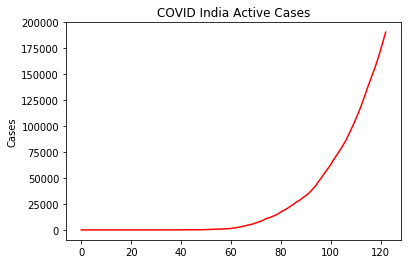

In [7]:
plt.plot(df.index, df['active_cases'], 'r')
plt.title('COVID India Active Cases')
plt.ylabel('Cases');
plt.show()

In [8]:
df = df.set_index('Day')
df.index

DatetimeIndex(['2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
               '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-08', '2020-02-09',
               ...
               '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
               '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30',
               '2020-05-31', '2020-06-01'],
              dtype='datetime64[ns]', name='Day', length=123, freq=None)

In [9]:
y = df['active_cases']

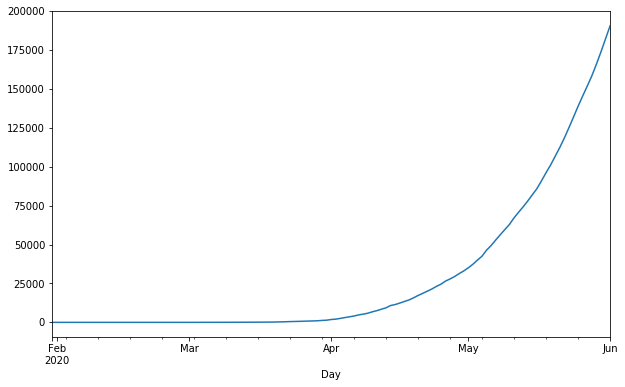

In [10]:
y.plot(figsize=(10, 6))
plt.show()

In [11]:
df.isnull().sum()

active_cases    0
dtype: int64

In [12]:
#for i in range(len(df.index)) :
 #   print("Nan in row ", i , " : " ,  df.iloc[i].isnull().sum())

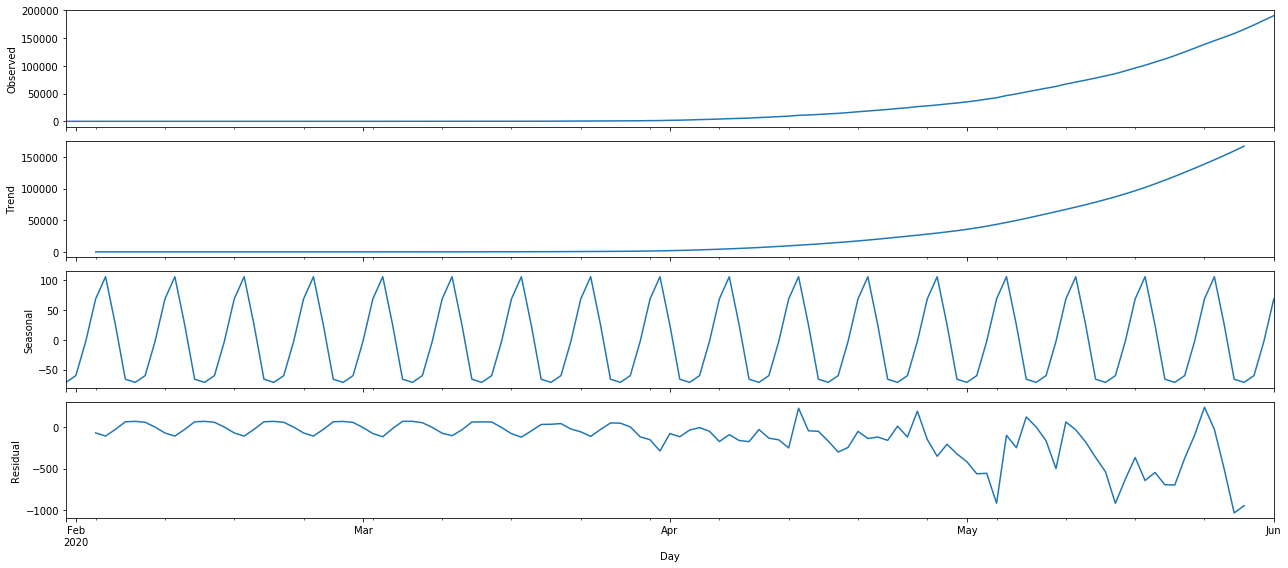

In [13]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [14]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3015.827777494252
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2678.872442590879
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2567.2240315633544
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2255.6573016283005
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2173.0390927944936
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2123.7288784880852
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1841.9742004807874
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1824.377775383348
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2905.885427461329
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2604.372351585544
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2467.2695406737685
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2184.2290244382248
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2639.6701578740367
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1956.2315321209035
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1746.0566662458002
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1724.21199059217
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2263.0515619879543
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1964.8255320606206

In [15]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0336      0.006    177.812      0.000       1.022       1.045
ma.L1         -0.5343      0.066     -8.035      0.000      -0.665      -0.404
ar.S.L12       0.0713      0.257      0.278      0.781      -0.432       0.574
ma.S.L12      -0.7304      0.286     -2.551      0.011      -1.292      -0.169
sigma2      7.961e+04   8087.668      9.844      0.000    6.38e+04    9.55e+04


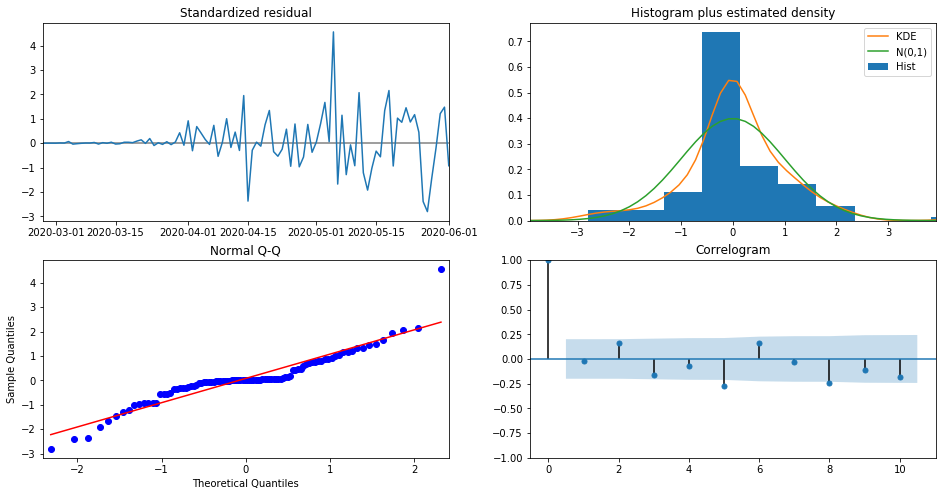

In [16]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

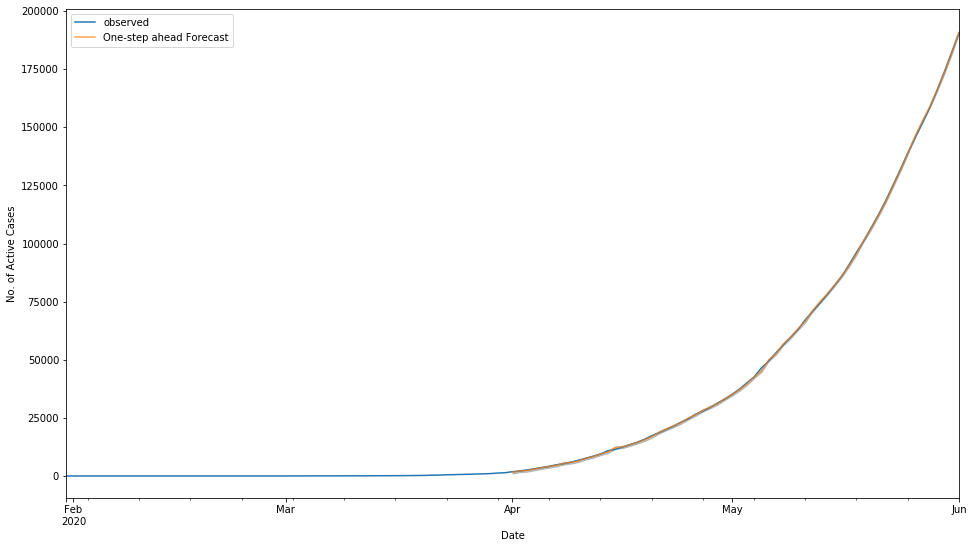

In [17]:
pred = results.get_prediction(start=pd.to_datetime('2020-04-1'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(16, 9))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('No. of Active Cases')
plt.legend()
plt.show()

In [18]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 123353.26
The Root Mean Squared Error of our forecasts is 351.22


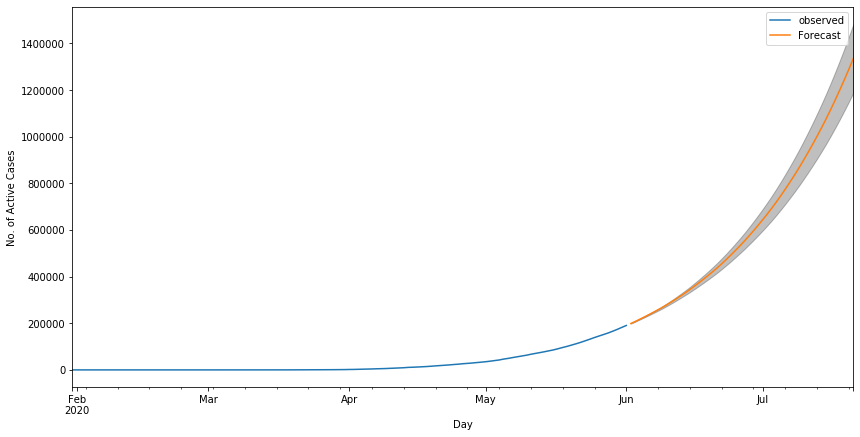

In [19]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Day')
ax.set_ylabel('No. of Active Cases')
plt.legend()
plt.show()

In [20]:
pred_ci

,lower active_cases,upper active_cases
2020-06-02,1.985405e+05,1.996471e+05
2020-06-03,2.070606e+05,2.090548e+05
2020-06-04,2.161361e+05,2.191277e+05
2020-06-05,2.252618e+05,2.293731e+05
2020-06-06,2.346832e+05,2.400376e+05
2020-06-07,2.441924e+05,2.509124e+05
2020-06-08,2.538948e+05,2.621023e+05
2020-06-09,2.638494e+05,2.736662e+05
2020-06-10,2.746533e+05,2.862015e+05
2020-06-11,2.857735e+05,2.991757e+05


In [21]:
df_pred = pd.DataFrame(pred_ci)
df_pred.head()

,lower active_cases,upper active_cases
2020-06-02,198540.527903,199647.057164
2020-06-03,207060.583569,209054.757229
2020-06-04,216136.094206,219127.706211
2020-06-05,225261.774771,229373.134916
2020-06-06,234683.227020,240037.615810


In [22]:
df_pred['mean_upper_lower']=df_pred.mean(axis=1)

In [23]:
df_pred.to_excel(r'C:\Users\Vatsal\Downloads\Excel\COVID_Output.xlsx')